# Chini Tang
# OPTI556 HW3 Problem 1, 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline

plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from keras.datasets import mnist


# Problem 1

In [ ]:
def qres(p):
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr

def create_MURA(p):
  qr = qres(p)
  t = np.zeros((p,p));
  t[1:p,0] = 1;
  for i in range(1,p):
      for j in range(1,p):
          if qr[i-1] == qr[j-1]:
              t[i,j] = 1;
  
  ht = 2 * (t - 0.5)
  ht[0,0] = 1;
  return t, ht

h conv ht should be a delta function. For MURA matrix h, it is easy to obtain ht just simply makes 0 to be -1.

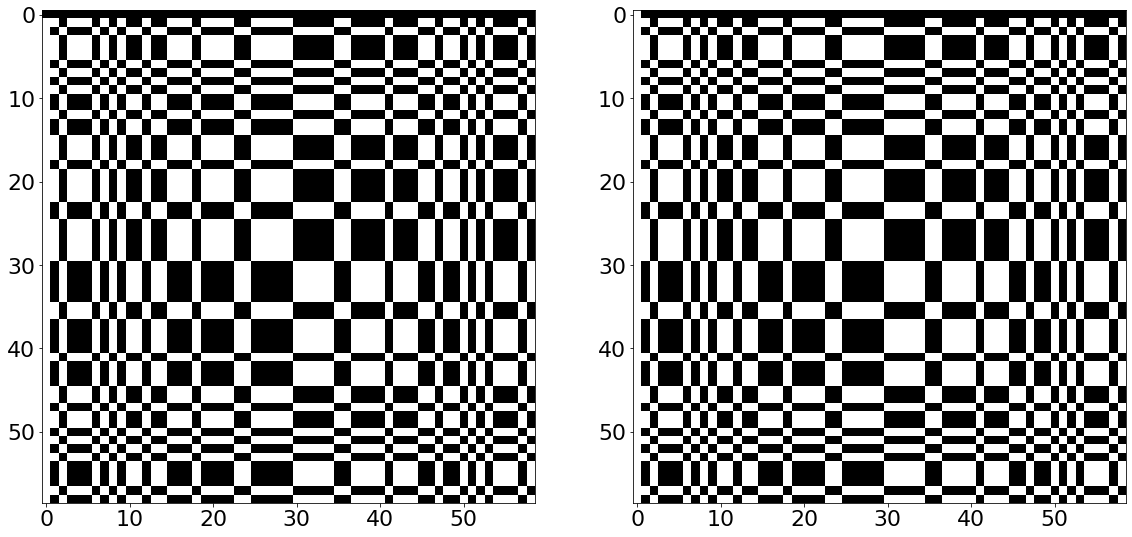

In [ ]:
p = 59
t, ht = create_MURA(p)
cp = signal.convolve2d(ht,t, mode='same',boundary='wrap');

plt.rcParams['figure.figsize'] = [30, 10]
plt.subplot(1,3,1)
plt.imshow(t,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(ht,cmap='gray')

Indeed, it is a delta function

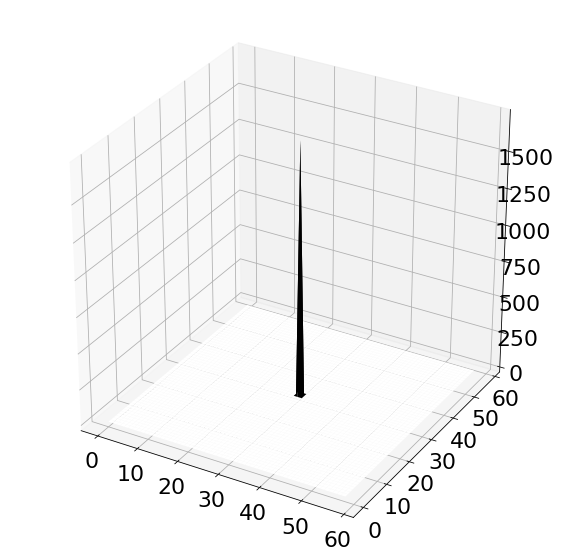

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))
surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')

Create Mnist dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

imagey_0 = x_train[10]
imagey_1 = x_train[30]

img_start = int((p+1)/2) - int(imagey_0.shape[0]/2)
img_end = int((p+1)/2) + int(imagey_0.shape[0]/2)

show the original image, measured image and reconstructed image (without noise)

(-0.5, 27.5, 27.5, -0.5)

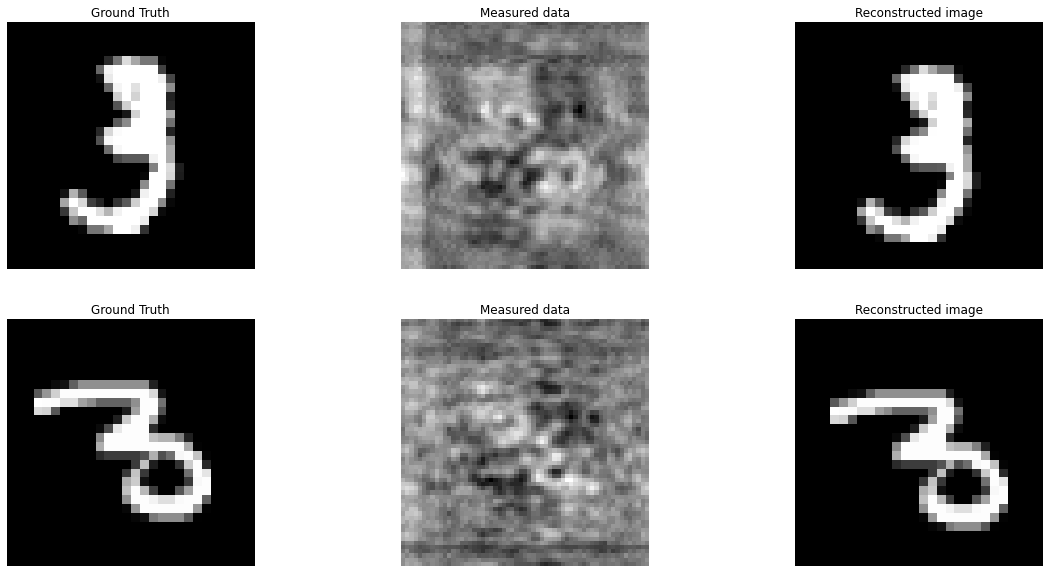

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]


# image 0
g = signal.convolve2d(t,imagey_0, mode='same',boundary='wrap');
plt.subplot(2,3,1);
plt.imshow(imagey_0,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')

plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')

plt.subplot(2,3,3);
fe = signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe[img_start:img_end,img_start:img_end], cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')



# iamge 1
g=signal.convolve2d(t,imagey_1, mode='same',boundary='wrap');

plt.subplot(2,3,4);
plt.imshow(imagey_1,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')

plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')

plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe[img_start:img_end,img_start:img_end], cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

show the original image, measured image and reconstructed image (with poisson noise, photon per pixel = 100)

(-0.5, 27.5, 27.5, -0.5)

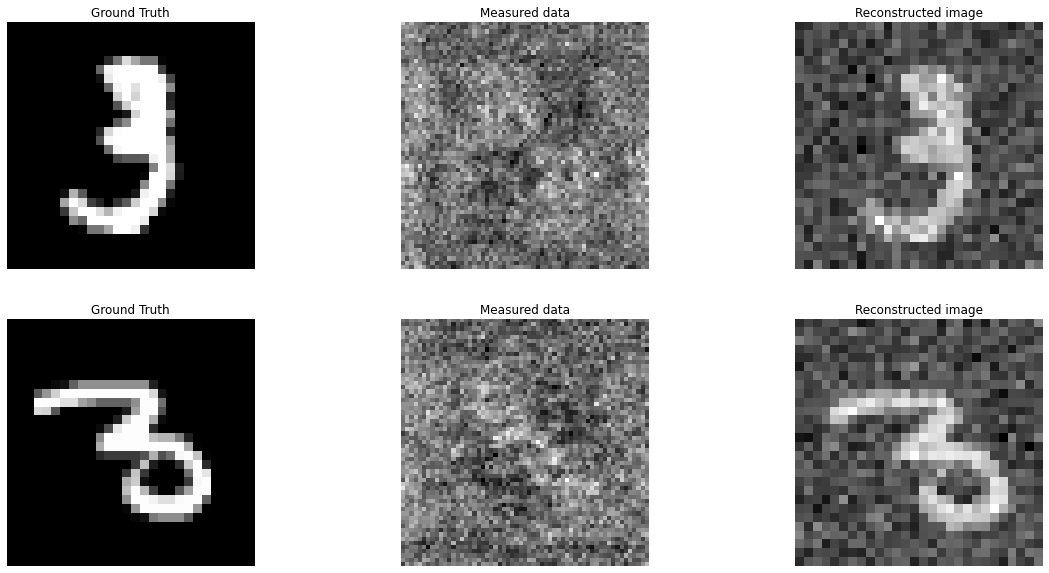

In [ ]:
photonperpix = 100

# image 1
g = signal.convolve2d(t,imagey_0, mode='same',boundary='wrap');
g_pnoise = np.random.poisson(lam=g * photonperpix / np.mean(g), size = g.shape)

plt.subplot(2,3,1);
plt.imshow(imagey_0,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g_pnoise,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g_pnoise, mode='same',boundary='wrap');
plt.imshow(fe[img_start:img_end,img_start:img_end], cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')


# image 2
g = signal.convolve2d(t,imagey_1, mode='same',boundary='wrap');
g_pnoise = np.random.poisson(lam=g * photonperpix / np.mean(g), size = g.shape)

plt.subplot(2,3,4);
plt.imshow(imagey_1,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g_pnoise,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g_pnoise, mode='same',boundary='wrap');
plt.imshow(fe[img_start:img_end,img_start:img_end], cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

show the original image, measured image and reconstructed image (with poisson noise, photon per pixel = 10)

(-0.5, 27.5, 27.5, -0.5)

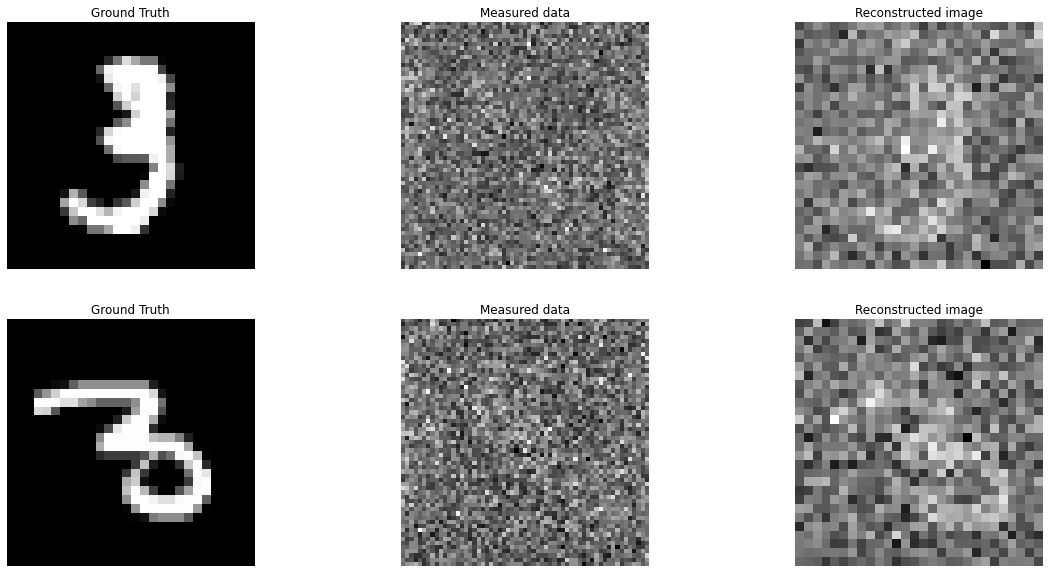

In [ ]:
photonperpix = 10

# image 1
g = signal.convolve2d(t,imagey_0, mode='same',boundary='wrap');
g_pnoise = np.random.poisson(lam=g * photonperpix / np.mean(g), size = g.shape)

plt.subplot(2,3,1);
plt.imshow(imagey_0,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g_pnoise,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g_pnoise, mode='same',boundary='wrap');
plt.imshow(fe[img_start:img_end,img_start:img_end], cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')


# image 2
g = signal.convolve2d(t,imagey_1, mode='same',boundary='wrap');
g_pnoise = np.random.poisson(lam=g * photonperpix / np.mean(g), size = g.shape)

plt.subplot(2,3,4);
plt.imshow(imagey_1,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g_pnoise,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g_pnoise, mode='same',boundary='wrap');
plt.imshow(fe[img_start:img_end,img_start:img_end], cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

As photon per pixel increase N times, noise increase (N)^0.5 times. so larger photon per pixel, better reconstrcted image could be obtained (siganl to noise would be larger). 

# Problem 2

Training data preparation

In [ ]:
(y_train, __), (y_test, __) = mnist.load_data()

y_train = y_train.astype("float32")/255.0
y_test = y_test.astype("float32")/255.0

x_test = np.zeros(np.shape(y_test))
x_train = np.zeros(np.shape(y_train))

for pop in range(np.shape(x_test)[0]):
  x_test[pop,:,:] = cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,y_test[pop,:,:], mode='same',boundary='wrap'))\
                                               ,mode='same',boundary='wrap'),dsize=(28,28))
  x_test[pop,:,:] = x_test[pop,:,:]/np.max(x_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  x_train[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,y_train[pop,:,:], mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(28,28))
  x_train[pop,:,:]=x_train[pop,:,:]/np.max(x_train[pop,:,:])

y_train = np.reshape(y_train, (len(y_train), 28, 28, 1))
y_test = np.reshape(y_test, (len(y_test), 28, 28, 1))
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


plt.imshow(x_test[1931].reshape(28, 28))

## original network training

Build the neural network -- original

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0     

start training

In [ ]:
autoencoder.fit(
    x = x_train,
    y = y_train,
    epochs = 50,
    batch_size = 128,
    shuffle = True,
    validation_data = (x_test, y_test),
)

Epoch 1/50
469/469 [==============================] - 7s 14ms/step - loss: 0.1239 - val_loss: 0.1176
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1163 - val_loss: 0.1116
Epoch 3/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1114 - val_loss: 0.1075
Epoch 4/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1080 - val_loss: 0.1052
Epoch 5/50
469/469 [==============================] - 6s 14ms/step - loss: 0.1055 - val_loss: 0.1033
Epoch 6/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1035 - val_loss: 0.1015
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1019 - val_loss: 0.0994
Epoch 8/50
469/469 [==============================] - 6s 14ms/step - loss: 0.1006 - val_loss: 0.0982
Epoch 9/50
469/469 [==============================] - 6s 14ms/step - loss: 0.0995 - val_loss: 0.0975
Epoch 10/50
469/469 [==============================] - 6s 14ms/step - loss: 0.0987 - val_lo

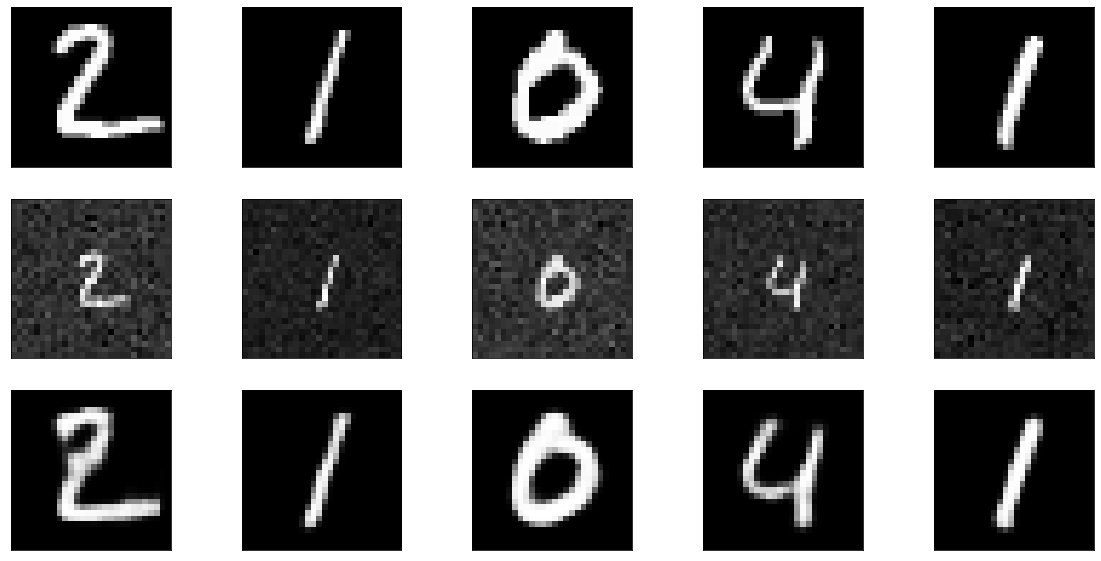

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):

    ax = plt.subplot(3, n, i)
    plt.imshow(y_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, n+i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(x_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## modified network training

Build the neural network -- modified:

I add dropout layer and L1 regularization in order to prevent overfitting, because thie network is deep, it is more easier to overfitting.

In [ ]:
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, UpSampling2D, add

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.3)(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(x)
encoded = layers.Conv2D(64, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(x)



x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', activity_regularizer=regularizers.l1(10e-10))(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same', activity_regularizer=regularizers.l1(10e-10))(x)

autoencoder_2 = keras.Model(input_img, decoded)
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_2.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 7, 7, 32)          0  

start training

In [ ]:
autoencoder_2.fit(
    x = x_train,
    y = y_train,
    epochs = 50,
    batch_size = 128,
    shuffle = True,
    validation_data = (x_test, y_test),
)

Epoch 1/50
469/469 [==============================] - 21s 42ms/step - loss: 0.1926 - val_loss: 0.1235
Epoch 2/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1331 - val_loss: 0.1105
Epoch 3/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1232 - val_loss: 0.1058
Epoch 4/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1178 - val_loss: 0.1007
Epoch 5/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1146 - val_loss: 0.0998
Epoch 6/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1120 - val_loss: 0.0974
Epoch 7/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1101 - val_loss: 0.0988
Epoch 8/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1086 - val_loss: 0.0965
Epoch 9/50
469/469 [==============================] - 19s 41ms/step - loss: 0.1076 - val_loss: 0.0936
Epoch 10/50
469/469 [==============================] - 19s 41ms/step - loss: 0.106

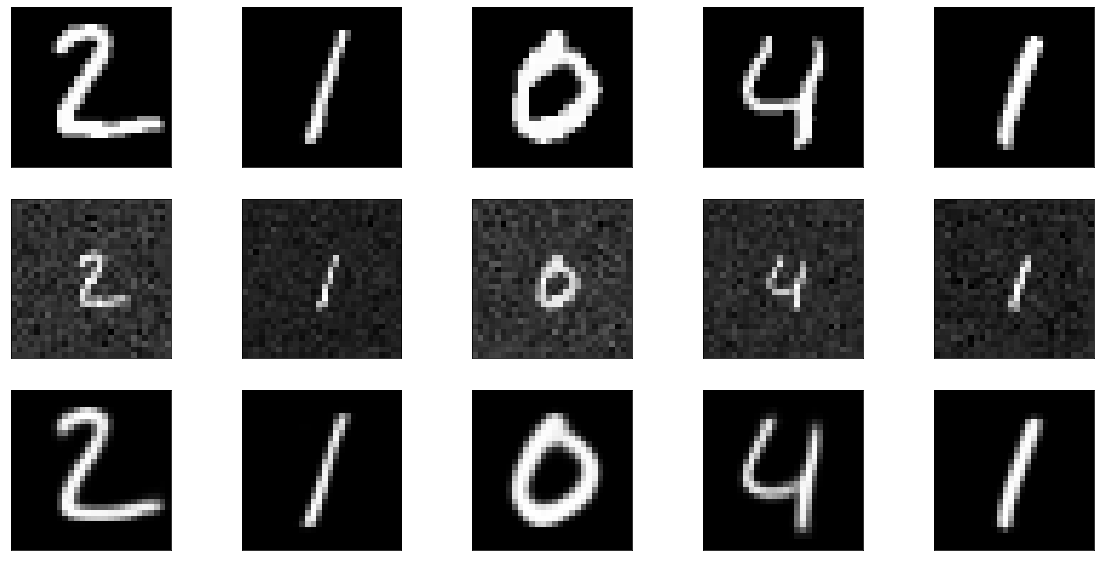

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):

    ax = plt.subplot(3, n, i)
    plt.imshow(y_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, n+i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder_2.predict(x_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)